<a href="https://colab.research.google.com/github/shoutingraven369/titanic-dataset/blob/main/elevate_lab_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer

In [209]:
df= pd.read_csv("/Titanic-Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df["Age"].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


dataset for survived passengeer


In [211]:
survived = df["Survived"]==1
dfy=df[survived]
dfy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


dataset of passengers who didn't survive

In [212]:
nsurvived = df["Survived"]==0
dfn=df[nsurvived]
dfn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [213]:
dfn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [214]:
dfy["Age"]=dfy["Age"].fillna(dfy["Age"].mean())
dfy.info()
dfn["Age"]=dfn["Age"].fillna(dfn["Age"].mean())
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          342 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 n

<ipython-input-214-4b221484a1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfy["Age"]=dfy["Age"].fillna(dfy["Age"].mean())
<ipython-input-214-4b221484a1b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn["Age"]=dfn["Age"].fillna(dfn["Age"].mean())


In [215]:
df=pd.concat([dfy, dfn],ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [216]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,3,female,26.0,0,0,7.9250,S
2,1,1,female,35.0,1,0,53.1000,S
3,1,3,female,27.0,0,2,11.1333,S
4,1,2,female,14.0,1,0,30.0708,C


In [217]:
df["Age"]=df["Age"].astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38,1,0,71.2833,C
1,1,3,female,26,0,0,7.9250,S
2,1,1,female,35,1,0,53.1000,S
3,1,3,female,27,0,2,11.1333,S
4,1,2,female,14,1,0,30.0708,C


In [218]:
Df=df[["Survived","Pclass","Sex","Embarked"]]

In [219]:
ohe=OneHotEncoder(use_cat_names=True)

ohe.fit(Df)
df_ohe=ohe.transform(Df)
df_ohe.head()

,Survived,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_S,Embarked_Q,Embarked_nan
0,1,1,1,0,1,0,0,0
1,1,3,1,0,0,1,0,0
2,1,1,1,0,0,1,0,0
3,1,3,1,0,0,1,0,0
4,1,2,1,0,1,0,0,0


In [220]:
df=pd.concat([df_ohe,df],axis=1)
df.head()

,Survived,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_S,Embarked_Q,Embarked_nan,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,0,1,0,0,0,1,1,female,38,1,0,71.2833,C
1,1,3,1,0,0,1,0,0,1,3,female,26,0,0,7.9250,S
2,1,1,1,0,0,1,0,0,1,1,female,35,1,0,53.1000,S
3,1,3,1,0,0,1,0,0,1,3,female,27,0,2,11.1333,S
4,1,2,1,0,1,0,0,0,1,2,female,14,1,0,30.0708,C


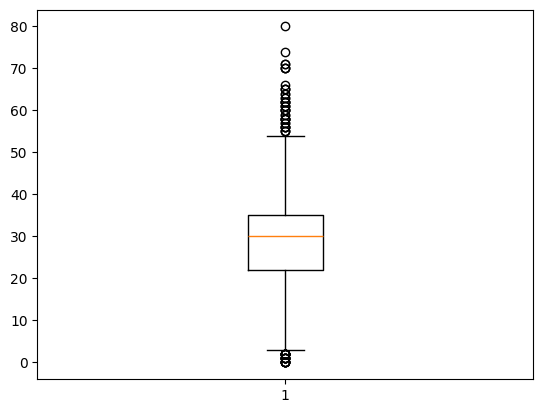

In [221]:
plt.boxplot(df["Age"]);

In [222]:
low ,high =df['Age'].quantile([0.1,0.9])
without_outliers= df["Age"].between(low,high)
df= df[without_outliers]

In [223]:
df["Age"].describe()

,Age
count,719.000000
mean,29.055633
std,7.208956
min,16.000000
25%,24.000000
50%,30.000000
75%,32.000000
max,47.000000


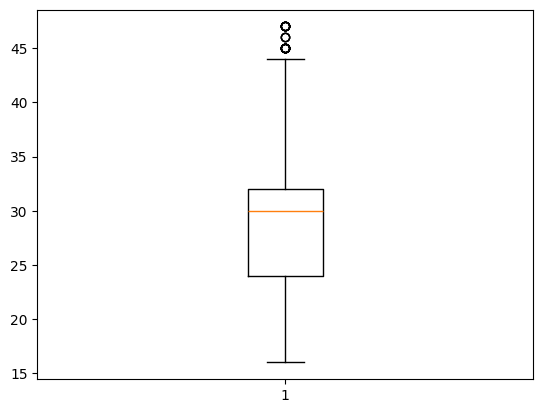

In [224]:
plt.boxplot(df["Age"]);